In [1]:
import numpy as np
from qiskit import *

Performing block encoding of $2\times2$ matrix on the form:
\begin{equation}
A=\frac{1}{2}(\alpha_1I+\alpha_2\sigma_x)=\frac{1}{2}\begin{pmatrix} \alpha_1 \alpha_2 \\ \alpha_2 \alpha_1
\end{pmatrix}
\end{equation}

In [2]:
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]])
print(A)

[[1.5 2. ]
 [2.  1.5]]


In [3]:
spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
A = 1/2*A/spectral_norm
print(A)

[[0.2236068 0.2981424]
 [0.2981424 0.2236068]]


In [4]:
alpha_1, alpha_2 = 2*A[0,0], 2*A[0,1]
print(alpha_1,alpha_2)

0.4472135954999579 0.5962847939999439


In [5]:
theta_1 = np.arccos(alpha_1)
theta_2 = np.arccos(alpha_2) - theta_1
print(theta_1, theta_2)

1.1071487177940904 -0.17521753523460504


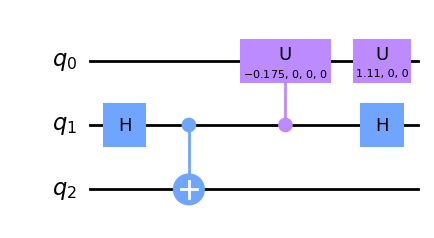

In [6]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0)
circ.u(theta=theta_1, phi=0.0,lam=0.0,qubit=0)
circ.h(qubit=1)
circ.draw('mpl')

In [7]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [8]:
# Create a Quantum Program for execution
job = backend.run(circ)

In [9]:
result = job.result()
statevector_result = np.array(result.data()['statevector'])
print(statevector_result)

[ 0.4253254 +0.00000000e+00j  0.26286556+0.00000000e+00j
  0.4253254 +0.00000000e+00j  0.26286556+0.00000000e+00j
  0.44669408-5.47042473e-17j  0.22464283-2.75108122e-17j
 -0.44669408+5.47042473e-17j -0.22464283+2.75108122e-17j]


In [16]:
A[0][0]*2

0.4472135954999579

In [12]:
statevector_result.T@statevector_result

(1-1.224646799147353e-16j)

In [13]:
# Probability |0>|0>|j>
statevector_result[0]**2+statevector_result[1]**2

(0.2500000000000001+0j)

In [10]:
# Matrix repr. of circuit
import qiskit.quantum_info as qi
op = qi.Operator(circ)
print(op.data)

[[ 0.4253254 +0.j -0.26286556+0.j  0.4253254 +0.j -0.26286556+0.j
   0.44669408+0.j -0.22464283+0.j -0.44669408+0.j  0.22464283+0.j]
 [ 0.26286556+0.j  0.4253254 +0.j  0.26286556+0.j  0.4253254 +0.j
   0.22464283+0.j  0.44669408+0.j -0.22464283+0.j -0.44669408+0.j]
 [ 0.4253254 +0.j -0.26286556+0.j  0.4253254 +0.j -0.26286556+0.j
  -0.44669408+0.j  0.22464283+0.j  0.44669408+0.j -0.22464283+0.j]
 [ 0.26286556+0.j  0.4253254 +0.j  0.26286556+0.j  0.4253254 +0.j
  -0.22464283+0.j -0.44669408+0.j  0.22464283+0.j  0.44669408+0.j]
 [ 0.44669408+0.j -0.22464283+0.j -0.44669408+0.j  0.22464283+0.j
   0.4253254 +0.j -0.26286556+0.j  0.4253254 +0.j -0.26286556+0.j]
 [ 0.22464283+0.j  0.44669408+0.j -0.22464283+0.j -0.44669408+0.j
   0.26286556+0.j  0.4253254 +0.j  0.26286556+0.j  0.4253254 +0.j]
 [-0.44669408+0.j  0.22464283+0.j  0.44669408+0.j -0.22464283+0.j
   0.4253254 +0.j -0.26286556+0.j  0.4253254 +0.j -0.26286556+0.j]
 [-0.22464283+0.j -0.44669408+0.j  0.22464283+0.j  0.44669408+0.j
   

In [11]:
nul, et = np.array([[1],[0]]), np.array([[0],[1]])
np.kron(et,et)

array([[0],
       [0],
       [0],
       [1]])